# Group Assignment - Portfolio Generation

### Team Number: 7
### Team Members: Ashton, Bodhana, Johnson
### Team Strategy: Risky

In [17]:
# Import Necessary Libraries
from IPython.display import display, Math, Latex
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdate
from datetime import datetime

## Global Constants

We start by setting the following global constants:
* CSV file of tickers
* Start and end date interval we will be analyzing to assemble our final portfolio
* End date is also used as the date we generate our final portfolio
* Flat fee applied to each stock (NOT share) purchased
* Number of stocks in our portfolio
* Investment amount

Our final portfolio will consist of 10 stocks (the minimum allowed) since the lower the number of stocks, the less diverse and ineffective at diversifying away non-systematic risk the portfolio will be. In simpler terms, losses in one stock are unlikely to be counteracted by gains in another when there are fewer stocks and vice versa, making these conditions more risky.

In [18]:
# Ticker CSV file
ticker_file_name = 'Tickers_Example.csv'

# Start and end dates for data analysis
# Start on first trading day in 2022 and end on day of simulation
# Period is reflective of current economic situation
start_date = '2022-01-04'
end_date = '2023-11-25'

# Flat fee of $4.95 CAD charged on every stock in portfolio
flat_fee = 4.95

# Number of stocks chosen (less stocks -> less diversification)
num_stocks = 10

# Investment amount in CAD
investment = 750_000 - (flat_fee * num_stocks)

## Summary of Process

First, it is imperative to define what is considered the "riskiest" portfolio. By "riskiest," our group aimed to generate either the extreme highest or lowest percent returns on our initial investment. However, by definition, risk only describes the possibility of loss. Our data may reveal extremely high returns for a stock at one point in time, but with different market conditions, may also result in the great loss. Hence, we redefined risk for this assignment as **volatility** or the degree of a stock's fluctuation in the market, which constitutes both gains and losses. This is what we intend to maximize and measute; the greater the volatility, the greater the risk.

To do so, we first minimized diversification by selecting the minimium number of stocks: 10. Then to select our 10 stocks, we relied on a combination of two metrics: **correlation** and **beta**, whose purposes we will discuss in depth further on.

Our ideal objective is to the create a portfolio consisting of 10 stocks that exhibit perfect correlation to one another as we want all the stocks to move in the same direction. If all the stocks perform well, it would result in massive returns for the investor; however, if they do poorly, the investor could lose a significant amount of money. In other words, we want to avoid any stocks moving in opposite directions since that would support a diversified, risk-adverse portfolio.

Apart from being correlated to one another, we want the selected stocks to be the most volatile relative to the market, but we needed to determine whether market correlation or beta was the best metric to measure this. Overall, in order to figure out whether correlation between stocks, market correlation, beta, or a combined measure would yield the best performance, we designed and tested five strategies on past stock data, before selecting a final strategy based on which one generated the most volatile portfolio.

## Processing Tickers

We generate a list of tickers from the CSV file. The raw tickers are then filtered based on the given requirements:

* Ignore tickers that do not reference a valid stock denominated in either USD or CAD
* Only include stocks in your portfolio that have at least 150,000 shares of average monthly volume, as calculated based on the time interval of January 1, 2023 to October 31, 2023.
* Drop any month that does not have at least 18 trading days

In [19]:
# Get the list of tickers from the CSV file
raw_tickers = pd.read_csv(ticker_file_name, header = None)[0].tolist()
print(raw_tickers)

['AAPL', 'ABBV', 'ABT', 'ACN', 'AGN', 'AIG', 'AMZN', 'AXP', 'BA', 'BAC', 'BIIB', 'BK', 'BLK', 'BMY', 'C', 'CAT', 'CELG', 'CL', 'KO', 'LLY', 'LMT', 'MO', 'MON', 'MRK', 'PEP', 'PFE', 'PG', 'PM', 'PYPL', 'QCOM', 'RTN', 'RY.TO', 'SHOP.TO', 'T.TO', 'TD.TO', 'TXN', 'UNH', 'UNP', 'UPS', 'USB']


In [20]:
# Filter the file and return a list of valid stocks

# Start and end dates used for the filter calculations
required_start_for_filter = "2023-01-01"
required_end_for_filter = "2023-10-01"

# Minimum trading days and volume
minimum_days = 18
minimum_avg_volume = 150000

# List of valid exchange tickers
valid_us_exchanges = ['NMS', 'BTS', 'IEX', 'NAS', 'ASE', 'PCX', 'NYQ', 'OPR', 'OBB', 'PNK']
valid_can_exchanges = ['CSE', 'NEO', 'TOR', 'VAN']

# Empty list to store the valid tickers
valid_tickers = []

# Consumes a stock ticker and checks whether it is a valid stock based on assignment rules
def validate_stock(stock):

    stock_info = yf.Ticker(stock).fast_info

    # Accomodate for any tickers that give an error
    try:

        # Check if the stock is denominated in USD or CAD and is trading on a valid exchange
        if ((stock_info['currency'] == 'USD' or stock_info['currency'] == 'CAD') and
            (stock_info['exchange'] in valid_us_exchanges or stock_info['exchange'] in valid_can_exchanges)):

            # Get stock's historical data
            stock_hist = yf.Ticker(stock).history(start=required_start_for_filter, end=required_end_for_filter).dropna()

            # Create a dataframe of the number of trading days per month
            monthly_trading_days = stock_hist['Volume'].groupby(pd.Grouper(freq = 'MS')).count()

            # Create a dataframe of the stock's total monthly volume
            monthly_volume = stock_hist['Volume'].groupby(pd.Grouper(freq = 'MS')).sum()

            # Drop the months in the volumes which have less than the minimum amount of trading days
            for month in monthly_trading_days.index:

                num_of_days = monthly_trading_days.loc[month]

                if num_of_days < minimum_days:
                    monthly_volume.drop(month, inplace = True)

            # If the monthly volume requirement is met, add it to the list
            if monthly_volume.mean() >= minimum_avg_volume:
                valid_tickers.append(stock)

            else:
                print(f"{stock} did not meet the volume requirements.")

        else:
            print(f"{stock} is not in a Canadian or U.S. stock market.")

    except:
        print(f"{stock} is not valid.")

for ticker in raw_tickers:
    validate_stock(ticker)

print(f'Valid Tickers: {valid_tickers}')

AGN is not valid.
CELG is not valid.
MON is not valid.
RTN is not valid.
Valid Tickers: ['AAPL', 'ABBV', 'ABT', 'ACN', 'AIG', 'AMZN', 'AXP', 'BA', 'BAC', 'BIIB', 'BK', 'BLK', 'BMY', 'C', 'CAT', 'CL', 'KO', 'LLY', 'LMT', 'MO', 'MRK', 'PEP', 'PFE', 'PG', 'PM', 'PYPL', 'QCOM', 'RY.TO', 'SHOP.TO', 'T.TO', 'TD.TO', 'TXN', 'UNH', 'UNP', 'UPS', 'USB']


## Processing Close Prices of Stocks

The close prices for the valid tickers are added to a common dataframe. Since our investment is in CAD, the stocks denominated in USD will be converted to CAD using the exchange rate. This data will be used to calculate the historical percent returns of the stocks.

In [21]:
# Add close prices to a dataframe

# Consumes a list of stock tickers and an empty dataframe and produces a dataframe of the stocks' close prices
def add_close_prices(valid_tickers, close_price_data):

    for ticker in valid_tickers:
        close_price_data[ticker] = yf.Ticker(ticker).history(start = start_date, end = end_date, interval = '1d')['Close']

    return close_price_data

In [22]:
# Convert close prices of stocks denominated in USD to CAD

# Get USD -> CAD exchange data
exchange_close_data = pd.DataFrame(yf.Ticker("USDCAD=x").history(start = start_date, end = end_date, interval = '1d')['Close'])
exchange_close_data.rename(columns = {'Close':'1 USD = ? CAD'}, inplace = True)

# Remove timestamp from indices and retain date
# Enables comparison between the close price and exchange dataframes since the indices are in the same format
exchange_close_data.index = exchange_close_data.index.strftime('%Y-%m-%d')

# Consumes the close prices and exchange dataframes
# Returns the close prices dataframe with USD converted to CAD where applicable
def convert_USDtoCAD(close_price_data, exchange_close_data):

    for col in close_price_data.columns:

        stock_info = yf.Ticker(col).fast_info

        # Check if the stock is denominated in USD and convert to CAD if so
        if (stock_info['currency'] == 'USD'):
            close_price_data[col] = close_price_data[col] * exchange_close_data['1 USD = ? CAD']

    return close_price_data

In [23]:
# Create a dataframe of the adjusted close prices (USD -> CAD)

# Consumes a list of stock tickers and exchange dataframe and produces a dataframe of the stocks' adjusted close prices
def create_close_price_dataframe(valid_tickers, exchange_close_data):

    close_price_data = pd.DataFrame()

    # Add raw close prices
    close_price_data = add_close_prices(valid_tickers, close_price_data)

    # Normalize index to index of exchange dataframe (same type)
    close_price_data.index = close_price_data.index.strftime('%Y-%m-%d')

    # Extract exchange data for ONLY trading days
    exchange_close_data = exchange_close_data[exchange_close_data.index.isin(close_price_data.index)]

    # Convert stocks denominated in USD to CAD
    convert_USDtoCAD(close_price_data, exchange_close_data)

    return close_price_data

In [24]:
# Generate STOCK CLOSE PRICES dataframe and display
close_price_data = create_close_price_dataframe(valid_tickers, exchange_close_data)
close_price_data.head()

,AAPL,ABBV,ABT,ACN,AIG,AMZN,AXP,BA,BAC,BIIB,...,QCOM,RY.TO,SHOP.TO,T.TO,TD.TO,TXN,UNH,UNP,UPS,USB
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-04,226.552312,159.442475,166.927881,500.642404,72.157410,213.612338,215.355718,272.406035,58.458187,308.237178,...,229.053404,126.313416,155.223007,27.261305,92.310959,229.405983,610.956484,308.201532,257.939859,68.905421
2022-01-05,219.714953,159.690512,165.566694,490.016781,70.905012,208.805697,212.277250,270.692656,57.260125,303.978180,...,227.321135,127.679558,151.345001,27.261305,92.868446,223.794567,607.209015,307.993899,253.762322,68.289852
2022-01-06,216.994389,159.635162,166.267947,468.398370,72.439738,208.313740,215.161682,269.671956,58.669193,302.797186,...,227.644466,129.054947,148.746994,27.297941,93.435226,224.703526,584.912946,310.200890,257.345734,70.454758
2022-01-07,216.699900,158.848904,166.393873,458.338026,74.162512,206.934499,216.494969,274.335816,59.808637,296.104467,...,220.344721,130.845718,144.617996,27.169699,93.875839,215.390440,569.812708,311.048913,258.544101,71.401654
2022-01-10,215.306918,159.576187,164.939271,458.102204,74.489951,204.229726,214.288968,264.712270,59.115243,297.594211,...,218.017137,131.565720,143.389008,27.004810,93.491478,218.178639,573.984060,303.555656,249.281916,71.353062


## Processing Percent Returns of Stocks

Using the close prices, the percent returns of each stock are added to a common dataframe to later calculate correlation.

In [25]:
# Create a dataframe of percent returns

# Consumes the close price dataframe and produces a dataframe of the stocks' adjusted close prices
def create_stock_return_dataframe(close_price_data):

    stock_return_data = pd.DataFrame()

    for stock in close_price_data.columns:

      # Calculate percent return of stock and add to dataframe
      stock_return_data[stock] = close_price_data[stock].pct_change()

    # Drop day one (NaN value since previous value not in date range to compare)
    stock_return_data.drop(index = stock_return_data.index[0], inplace = True)

    return stock_return_data

In [26]:
# Generate STOCK RETURN dataframe and display
stock_return_data = create_stock_return_dataframe(close_price_data)
stock_return_data.head()

,AAPL,ABBV,ABT,ACN,AIG,AMZN,AXP,BA,BAC,BIIB,...,QCOM,RY.TO,SHOP.TO,T.TO,TD.TO,TXN,UNH,UNP,UPS,USB
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-05,-0.030180,0.001556,-0.008154,-0.021224,-0.017356,-0.022502,-0.014295,-0.006290,-0.020494,-0.013817,...,-0.007563,0.010815,-0.024983,0.000000,0.006039,-0.024461,-0.006134,-0.000674,-0.016196,-0.008934
2022-01-06,-0.012382,-0.000347,0.004235,-0.044118,0.021645,-0.002356,0.013588,-0.003771,0.024608,-0.003885,...,0.001422,0.010772,-0.017166,0.001344,0.006103,0.004062,-0.036719,0.007166,0.014121,0.031702
2022-01-07,-0.001357,-0.004925,0.000757,-0.021478,0.023782,-0.006621,0.006197,0.017295,0.019421,-0.022103,...,-0.032066,0.013876,-0.027759,-0.004698,0.004716,-0.041446,-0.025816,0.002734,0.004657,0.013440
2022-01-10,-0.006428,0.004578,-0.008742,-0.000515,0.004415,-0.013071,-0.010190,-0.035079,-0.011594,0.005031,...,-0.010563,0.005503,-0.008498,-0.006069,-0.004094,0.012945,0.007321,-0.024090,-0.035824,-0.000681
2022-01-11,0.018239,0.005690,0.004689,0.007096,0.007302,0.025468,0.010884,0.033535,0.007162,0.027860,...,0.033311,0.008840,0.015957,0.004749,0.009225,0.010627,0.010046,-0.014014,-0.000745,0.013835


## Optimize Weightings

We started from first principles and determined that in order to maximize volatility, we should maximize the amount invested into the most volatile stock and progress down the list. After consulting with past CFM 101 students, we arrived at the following code to calculate our weights and comply with the requirements to cap a stock at 25% of the portfolio and have a minimum of 100/2n where n is the number of stocks (n = 10).

In [27]:
# Calculate optimal weightings for 10 stocks in order of volatility

max_weight = 25
min_weight = 100 / (2 * num_stocks)

# Weight already used for prior stocks in list
total_weight = 0

# Empty list to store the optimal weights
optimal_weights_lst = []

# Number of stocks left after one subtracted every time loop runs
stocks_left = num_stocks

while (stocks_left != 0):

    # Weight of next stock on list
    next_weight = min_weight * (stocks_left - 1)
    # Weight left after next weighting is applied
    rem_weight = 100 - next_weight - total_weight

    if (rem_weight > max_weight):
        optimal_weights_lst.append(max_weight / 100)
        total_weight += max_weight
        
    elif (rem_weight > min_weight):
        optimal_weights_lst.append(rem_weight / 100)
        total_weight += rem_weight
        
    else: # rem_weight <= min_weight
        optimal_weights_lst.append(min_weight / 100)
        total_weight += min_weight

    stocks_left -= 1

print(optimal_weights_lst)

[0.25, 0.25, 0.15, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]


## Strategy 0

To select the 10 most volatile stocks, a brute force solution is not possible. The number of possibilities would be x choose 10 with x being the number of candidate stocks. For example, even a relatively small x-value of 50 would lead to the number of possibilities spanning over 12 billion stock combinations. This is O(n^(x-10)) time complexity, reasonable with a dedicated computer for running the calculations, but impractical for the purposes of this assignment. Even looping from 0 to 12 billion was a lengthy computation for Python.

Hence, we shifted our focus to finding a heuristic solution or a strategy not guaranteed to find the optimal solution but a satisfactory one in a reasonable amount of time.

## Strategy 1

This strategy is built on the assumption that given Stock A, all other stocks that demonstrate a high correlation to Stock A have a high correlation amongst themselves.

We consider this to be a fair assumption. In an ideal world, we would invest in a singular stock, but that is not possible based on the requierements for this assignment. Thus, we want all 10 of our stocks to be very similar to carbon copies of each other. Once we select one of the stocks, then create a portfolio with the other stock, since they are carbon copies, the portfolio will not change. To reiterate, comparing the third carbon copy stock and so on would not result in a change.

In [28]:
# Create a dataframe of correlations between 2 stocks or correlations matrix

# Consumes the stock return dataframe and produces a correlations matrix
def create_stock_correl_dataframe(stock_return_data):

    correl_data = pd.DataFrame()

    # Calculate correlation using the pearson method
    # Source: https://www.geeksforgeeks.org/python-pandas-dataframe-corr/
    correl_data = stock_return_data.corr(method = "pearson")

    return correl_data

In [29]:
# Generate CORRELATIONS MATRIX dataframe and display
stock_correl_data = create_stock_correl_dataframe(stock_return_data)
stock_correl_data.head()

,AAPL,ABBV,ABT,ACN,AIG,AMZN,AXP,BA,BAC,BIIB,...,QCOM,RY.TO,SHOP.TO,T.TO,TD.TO,TXN,UNH,UNP,UPS,USB
AAPL,1.000000,0.216509,0.542476,0.720990,0.492164,0.634685,0.605320,0.499426,0.485297,0.332624,...,0.700248,0.341143,0.480866,0.314912,0.354302,0.698717,0.409928,0.454567,0.539057,0.381866
ABBV,0.216509,1.000000,0.406709,0.281710,0.302807,0.125726,0.235176,0.183340,0.276082,0.260875,...,0.165491,0.144669,0.026885,0.183548,0.175599,0.253866,0.454947,0.250491,0.249320,0.285757
ABT,0.542476,0.406709,1.000000,0.553082,0.452432,0.427039,0.481152,0.411094,0.485739,0.328723,...,0.460929,0.336173,0.307481,0.324082,0.334980,0.480487,0.404010,0.443173,0.453893,0.403314
ACN,0.720990,0.281710,0.553082,1.000000,0.515552,0.619379,0.607810,0.485218,0.522825,0.374259,...,0.644642,0.384034,0.444206,0.340581,0.386156,0.692981,0.393076,0.494315,0.566135,0.468573
AIG,0.492164,0.302807,0.452432,0.515552,1.000000,0.369103,0.654842,0.491377,0.701796,0.282077,...,0.467705,0.511819,0.270850,0.282938,0.529790,0.437187,0.368930,0.451775,0.458710,0.691669


In [30]:
# Calculate the average of the negative correlation values
# Large magnitude (close to -1) would indicate that the bottom 10 values should also be considered

neg_num_lst = []

for col in stock_correl_data:
    for val in stock_correl_data[col]:
        # Get negative correlation values and add them to empty list
        if (val < 0):
            neg_num_lst.append(val)

np.mean(neg_num_lst)

-0.031968693527954194

We do recognize that stocks may be negatively correlated to one another and hence the bottom 10 stocks may consist a riskier portfolio than the top 10. However, the probability of this occurring is slim (as seen by the extremely low average of the negative correlation values for the randomized stocks given in the CSV file). As a result, an assumption has been made that we can also expect randomized stocks during the simulation and hence the redundant implementation has been omitted.

This assumption carries over to other correlations calculated in subsequent strategies.

In [33]:
# Select a list of 9 stocks that are best correlated to a singular stock

max_sum = 0
top10_dict = {}

for stock in stock_correl_data.columns:

    # Get the sum of the top 10 correlation values to each stock
    # Subtract one to get rid of the correlation value = 1 with itself
    current_col_sum = stock_correl_data[stock].nlargest(10).sum() - 1

    # If current sum is larger than the max so far
    if current_col_sum > max_sum:
        max_sum = current_col_sum
        # Add the top 10 correlation values for the stock to a list
        top10_dict = stock_correl_data[stock].nlargest(10)

In [34]:
top10_df = pd.DataFrame(top10_dict.items(), columns = ["Ticker", "Correlation"])
top10_df

,Ticker,Correlation
0,BAC,1.000000
1,C,0.824880
2,BK,0.769155
3,USB,0.723853
4,AIG,0.701796
5,BLK,0.699242
6,AXP,0.691800
7,TD.TO,0.607616
8,RY.TO,0.581163
9,UPS,0.543100


In [35]:
# Final tickers from Strategy 1
s1_tickers = list(top10_df["Ticker"])
print(s1_tickers)

['BAC', 'C', 'BK', 'USB', 'AIG', 'BLK', 'AXP', 'TD.TO', 'RY.TO', 'UPS']


## Strategy 2

This strategy uses dynamic programming. The problem at hand is finding the stock that correlates the most to the current portfolio, adding it to the portfolio, and then finding the next stock that correlates with the portfolio that was just created.

This does not work on all data sets, because it is possible for the algorithm to get trapped in a local minimum. For example, if there were 5 stocks, where 2 of them are very closely correlated and the 3 other stocks are not, the model would dodge choosing the 3 stocks even if they are better correlated than the 2 very correlated stocks and a third non-correlated stock.

Despite this limitation, we thought that this could be a reasonable approach because in the real world, the correlations between stocks would be more random and it would be unlikely to have a single pair of closely correlated stocks with the rest moving in the opposite direction.

As depicted in the graph near the end of this file, this algorithm did not generate the most volatile portfolio for 10 stocks. Yet, it would be fascinating to use this strategy when a portfolio is scaled up (more stocks in the mix). The time complexity is O(n^2) so it will be a computationally viable option.

In [36]:
# Find pair with the highest correlation
# Combine pair into one portfolio
# Find the next stock, by taking the one with the most correlation to the portfolio

max_corr = 0

pair = []

stockPortfolio = pd.DataFrame()

for stock in stock_correl_data.columns:
    
    current_col_sum = stock_correl_data[stock].nlargest(2).sum() - 1
    
    if current_col_sum > max_corr:
        max_corr = current_col_sum
        pair = [stock, stock_correl_data[stock].nlargest(2).index[1]]

# Test code
# print(max_corr)
# print(pair)

stocks = stock_return_data

startingPortfolio = stocks[pair[0]] * 0.5 + stocks[pair[1]] * 0.5

curAssetDict = {}
curAssetDict[pair[0]] = True
curAssetDict[pair[1]] = True

def findMax(stocks, curPortfolio, numAssets, curAssetDict):

    if numAssets == 10:
        return curPortfolio

    runningMax = 0

    maxCandidate = pd.DataFrame()

    for stock in stock_return_data.columns:

        if stock in curAssetDict:
            continue

        correlation = stock_return_data[stock].corr(curPortfolio)

        if correlation > runningMax:
            runningMax = correlation
            maxCandidate = stock_return_data[stock]

    # Create equally-weighted portfolio
    curPortfolio = curPortfolio * (numAssets / (numAssets + 1)) + (1 / (numAssets+1)) * maxCandidate

    curAssetDict[maxCandidate.name] = True

    findMax(stocks,curPortfolio, numAssets + 1, curAssetDict)

findMax(stocks, startingPortfolio, 2, curAssetDict)

In [37]:
# Final tickers from Strategy 2
s2_tickers = list(curAssetDict)
print(s2_tickers)

['KO', 'PEP', 'PG', 'CL', 'ABT', 'UNH', 'MRK', 'ABBV', 'PM', 'PFE']


## Strategy 3

We can also determine which stocks move in the same direction by comparing them to the movement of an market index. In this model, the 10 stocks that are most correlated to the market in terms of percent returns will constitute the portfolio.

Due to the larger representation of stocks denominated in USD compared to CAD in the given CSV file, the assumption that the simulation file will follow a similar format was made. Accordingly, we decided to use the S&P500 index due to its reputation of being one of the "best gauges of large U.S. stocks" due to its depth and diversity (according to https://www.investopedia.com/terms/s/sp500.asp).

In [38]:
# Create a dataframe of the chosen market's returns

# Consumes a market index ticker and produces a dataframe of market percent returns
def create_market_return_dataframe(m_index):

    market_return_data = m_index.history(start = start_date, end = end_date, interval = '1d')['Close'].pct_change()

    market_return_data.index = market_return_data.index.strftime('%Y-%m-%d')

    market_return_data.drop(index = market_return_data.index[0], inplace = True)

    return market_return_data

# Create a dataframe of correlations between each stock and the chosen market

# Consumes the market return and stock return dataframes
# Produces a dataframe of their correlation values
def create_market_correl_dataframe(market_return_data, stock_return_data):

    market_correl_data = pd.DataFrame({"Ticker": stock_return_data.columns})
    corr_list = []

    for col in stock_return_data.columns:

        corr_list.append(stock_return_data[col].corr(market_return_data))

    market_correl_data["Correlation"]  = corr_list
    # Sort values from highest to lowest
    market_correl_data.sort_values(by = ['Correlation'], ascending = False, ignore_index = True, inplace = True)

    return market_correl_data

In [39]:
# Select S&P500 as market index
sp500 = yf.Ticker('^GSPC')

market_return_data = create_market_return_dataframe(sp500)
market_correl_data = create_market_correl_dataframe(market_return_data, stock_return_data)

top10_df2 = market_correl_data.head(10)
top10_df2

,Ticker,Correlation
0,AAPL,0.821321
1,BLK,0.803845
2,ACN,0.799809
3,TXN,0.745828
4,AMZN,0.735144
5,QCOM,0.725018
6,AXP,0.702923
7,BAC,0.661269
8,BK,0.649333
9,UPS,0.648137


In [40]:
# Final tickers from Strategy 3
s3_tickers = list(top10_df2["Ticker"])
print(s3_tickers)

['AAPL', 'BLK', 'ACN', 'TXN', 'AMZN', 'QCOM', 'AXP', 'BAC', 'BK', 'UPS']


## Strategy 4

This approach utilizes beta to determine the volatility of stocks in a given market. While correlation measures the tendency of 2 stocks to move in the same direction, it does not account for the relative size of these directional moves; is one stock losing or gaining value more than the other? Beta, on the other hand, accounts for both direction and relative volatility and can therefore be more insightful.

As with Strategy 3, we will be determining the 10 stocks with the largest beta values, which indicate that they are more volatile relative to the market. To calculate beta, we will be using the following formula, where the co-variance of the stock's return and market's return is divided by the variance of the market returns.

\begin{align*}
\beta=\frac{COV(x_i,r_M)}{\sigma^2(r_M)}
\end{align*}


In [41]:
# Create dataframe of the beta of each stock in relation to the chosen market

# Consumes the market return and stock return dataframes
# Produces a dataframe of the stocks' beta values
def create_beta_dataframe(market_return_data, stock_return_data):
    
    # Calculate the variance of the market returns
    market_var = market_return_data.var()
    
    beta_data = pd.DataFrame({"Ticker": stock_return_data.columns})
    
    beta_list = []

    for col in stock_return_data.columns:
        
        # Calculate beta using formula
        beta_list.append((stock_return_data[col].cov(market_return_data)) / market_var)

    beta_data["Beta"]  = beta_list
    
    beta_data.sort_values(by = ['Beta'], ascending = False, ignore_index = True, inplace = True)

    return beta_data

In [42]:
beta_data = create_beta_dataframe(market_return_data, stock_return_data)

top10_df3 = beta_data.head(10)
top10_df3

,Ticker,Beta
0,SHOP.TO,2.285797
1,AMZN,1.625729
2,PYPL,1.598603
3,QCOM,1.514591
4,BLK,1.275988
5,AAPL,1.268461
6,ACN,1.185570
7,BA,1.168665
8,AXP,1.136349
9,TXN,1.116554


SHOP.TO has the highest beta, but can be considered an outlier due to the unique circumstances surrounding the business. In addition to being a Canadian stock which may not be represented well by the S&P500, the company's valuation has also been on the decline leading to significant fluctuations in stock prices due to constant lay-offs.

Regardless, this strategy is the top contender as it is capable of detecting SHOP.TO, which is well-known as a high-risk stock (which the previous strategies overlooked).

In [43]:
# Final tickers from Strategy 4
s4_tickers = list(top10_df3["Ticker"])
s4_tickers

['SHOP.TO', 'AMZN', 'PYPL', 'QCOM', 'BLK', 'AAPL', 'ACN', 'BA', 'AXP', 'TXN']

## Strategy 5

This strategy takes Strategy 3, where we found the 10 most correlated stocks to the S&P500, and combines it with Strategy 4, where we found the 10 stocks with the highest beta. By ensuring that the stocks are correlated with the S&P500 and are weighted by their volatility via beta, we aim to build a portfolio that not only moves in the same direction but the stocks with larger magnitudes of change get larger weights in the investment.

In [44]:
# Get the return data of the 10 most correlated stocks from Strategy 3
# Calculate their betas and order them from greatest to least

correlated_stocks_w_beta = create_beta_dataframe(market_return_data, create_stock_return_dataframe(create_close_price_dataframe(s3_tickers, exchange_close_data)))
correlated_stocks_w_beta

,Ticker,Beta
0,AMZN,1.625729
1,QCOM,1.514591
2,BLK,1.275988
3,AAPL,1.268461
4,ACN,1.185571
5,AXP,1.136348
6,TXN,1.116554
7,BAC,1.003867
8,BK,0.962078
9,UPS,0.938861


In [45]:
# Final tickers from Strategy 5
s5_tickers = correlated_stocks_w_beta.Ticker.tolist()
print(s5_tickers)

['AMZN', 'QCOM', 'BLK', 'AAPL', 'ACN', 'AXP', 'TXN', 'BAC', 'BK', 'UPS']


## Portfolio Generation

Next up is generating portfolios for all our strategies which should contain:

* Ticker
* Price
* Currency
* Shares
* Value
* Weight

In [46]:
# Consumes the list of stocks generated by a strategy, investment, and date, and produces a portfolio dataframe
def generate_portfolio(tickers, investment, date):

    portfolio = pd.DataFrame()

    shares_in_each = []
    price_of_each = []
    investment_lst = []
    currency_lst = []

    for i in range(len(tickers)):

        investment_lst.append((optimal_weights_lst[i] * investment))
        shares_in_each.append(investment_lst[i] / close_price_data.loc[date, tickers[i]])
        price_of_each.append(close_price_data.loc[date , tickers[i]])
        
        stock_info = yf.Ticker(tickers[i]).fast_info
        if (stock_info['currency'] == 'USD'):
            currency_lst.append('USD')
        else:
            currency_lst.append('CAD')

    portfolio['Ticker'] = tickers
    portfolio['Price'] = price_of_each
    portfolio['Currency'] = currency_lst
    portfolio['Shares'] = shares_in_each
    portfolio['Value'] = investment_lst
    portfolio['Weight'] = optimal_weights_lst

    portfolio.index += 1

    return portfolio

In [47]:
# Portfolio for Strategy 1
portfolio1 = generate_portfolio(s1_tickers, investment, start_date)
portfolio1

,Ticker,Price,Currency,Shares,Value,Weight
1,BAC,58.458187,USD,3207.209018,187487.625,0.25
2,C,74.510377,USD,2516.261935,187487.625,0.25
3,BK,72.262799,USD,1556.714894,112492.575,0.15
4,USB,68.905421,USD,544.188316,37497.525,0.05
5,AIG,72.157410,USD,519.662844,37497.525,0.05
6,BLK,1112.691900,USD,33.699827,37497.525,0.05
7,AXP,215.355718,USD,174.119012,37497.525,0.05
8,TD.TO,92.310959,CAD,406.208813,37497.525,0.05
9,RY.TO,126.313416,CAD,296.860985,37497.525,0.05
10,UPS,257.939859,USD,145.373132,37497.525,0.05


In [48]:
# Portfolio for Strategy 2
portfolio2 = generate_portfolio(s2_tickers, investment, start_date)
portfolio2

,Ticker,Price,Currency,Shares,Value,Weight
1,KO,72.961176,USD,2569.690270,187487.625,0.25
2,PEP,210.725959,USD,889.722491,187487.625,0.25
3,PG,198.360470,USD,567.111859,112492.575,0.15
4,CL,103.000148,USD,364.053118,37497.525,0.05
5,ABT,166.927881,USD,224.633086,37497.525,0.05
6,UNH,610.956484,USD,61.375116,37497.525,0.05
7,MRK,93.219981,USD,402.247723,37497.525,0.05
8,ABBV,159.442475,USD,235.179021,37497.525,0.05
9,PM,111.897077,USD,335.107278,37497.525,0.05
10,PFE,64.422683,USD,582.054694,37497.525,0.05


In [49]:
# Portfolio for Strategy 3
portfolio3 = generate_portfolio(s3_tickers, investment, start_date)
portfolio3

,Ticker,Price,Currency,Shares,Value,Weight
1,AAPL,226.552312,USD,827.568801,187487.625,0.25
2,BLK,1112.691900,USD,168.499137,187487.625,0.25
3,ACN,500.642404,USD,224.696458,112492.575,0.15
4,TXN,229.405983,USD,163.454869,37497.525,0.05
5,AMZN,213.612338,USD,175.540071,37497.525,0.05
6,QCOM,229.053404,USD,163.706473,37497.525,0.05
7,AXP,215.355718,USD,174.119012,37497.525,0.05
8,BAC,58.458187,USD,641.441804,37497.525,0.05
9,BK,72.262799,USD,518.904965,37497.525,0.05
10,UPS,257.939859,USD,145.373132,37497.525,0.05


In [50]:
# Portfolio for Strategy 4
portfolio4 = generate_portfolio(s4_tickers, investment, start_date)
portfolio4

,Ticker,Price,Currency,Shares,Value,Weight
1,SHOP.TO,155.223007,CAD,1207.859765,187487.625,0.25
2,AMZN,213.612338,USD,877.700357,187487.625,0.25
3,PYPL,243.728354,USD,461.548988,112492.575,0.15
4,QCOM,229.053404,USD,163.706473,37497.525,0.05
5,BLK,1112.691900,USD,33.699827,37497.525,0.05
6,AAPL,226.552312,USD,165.513760,37497.525,0.05
7,ACN,500.642404,USD,74.898819,37497.525,0.05
8,BA,272.406035,USD,137.653063,37497.525,0.05
9,AXP,215.355718,USD,174.119012,37497.525,0.05
10,TXN,229.405983,USD,163.454869,37497.525,0.05


In [51]:
# Portfolio for Strategy 5
portfolio5 = generate_portfolio(s5_tickers, investment, start_date)
portfolio5

,Ticker,Price,Currency,Shares,Value,Weight
1,AMZN,213.612338,USD,877.700357,187487.625,0.25
2,QCOM,229.053404,USD,818.532367,187487.625,0.25
3,BLK,1112.691900,USD,101.099482,112492.575,0.15
4,AAPL,226.552312,USD,165.513760,37497.525,0.05
5,ACN,500.642404,USD,74.898819,37497.525,0.05
6,AXP,215.355718,USD,174.119012,37497.525,0.05
7,TXN,229.405983,USD,163.454869,37497.525,0.05
8,BAC,58.458187,USD,641.441804,37497.525,0.05
9,BK,72.262799,USD,518.904965,37497.525,0.05
10,UPS,257.939859,USD,145.373132,37497.525,0.05


## Comparing Strategies

Using the portfolios from above, we next generated dataframes to track the growth of the investment value over time (date range given by the start and end dates specified as global constants) if we had invested at a past date. By analyzing this data using visual (graph) and statistical (standard deviation) metrics, we can discover the portfolio with the greatest volatility and ultimately risk; this will be the final portfolio we choose for the simulation.

In [52]:
# Calculate total shares and value of each portfolio over an interval

# Consumes the list of stocks generated by a strategy, close price data dataframe, and the strategy's portfolio
# Produces dataframe of historical test data if the investment had been made at an earlier date with the given strategy
def create_test_portfolio(tickers, close_price_data, portfolio_df):

    test_portfolio_df = pd.DataFrame()
    i = 1 # Starting index of stock in portfolio dataframe

    for t in tickers:
        for col in close_price_data:
            if t == col:
                test_portfolio_df[col] = close_price_data[col] * portfolio_df["Shares"][i]
                i += 1

    test_portfolio_df["Total Value"] =  test_portfolio_df.sum(axis = 1)

    return test_portfolio_df

In [53]:
# Test Portfolio for Strategy 1
test_portfolio1 = create_test_portfolio(s1_tickers, close_price_data, portfolio1)
test_portfolio1.head()

,BAC,C,BK,USB,AIG,BLK,AXP,TD.TO,RY.TO,UPS,Total Value
Date,,,,,,,,,,,
2022-01-04,187487.625000,187487.625000,112492.575000,37497.525000,37497.525000,37497.525000,37497.525000,37497.525000,37497.525000,37497.525000,749950.500000
2022-01-05,183645.190442,184624.229839,111302.032456,37162.539387,36846.699973,36322.990412,36961.505115,37723.981331,37903.079341,36890.223446,739382.471742
2022-01-06,188164.366233,191511.567662,113870.522939,38340.656158,37644.240158,36634.427481,37463.739645,37954.212398,38311.378705,37411.155209,757306.266587
2022-01-07,191818.798426,193623.623640,115512.549875,38855.945876,38539.502099,36417.166958,37695.890288,38133.193198,38842.988892,37585.365679,767025.024930
2022-01-10,189594.939228,193087.726158,115622.008952,38829.502687,38709.659855,35411.319322,37311.783485,37977.062264,39056.729164,36238.892814,761839.623929


In [54]:
# Test Portfolio for Strategy 2
test_portfolio2 = create_test_portfolio(s2_tickers, close_price_data, portfolio2)
test_portfolio2.head()

,KO,PEP,PG,CL,ABT,UNH,MRK,ABBV,PM,PFE,Total Value
Date,,,,,,,,,,,
2022-01-04,187487.625000,187487.625000,112492.575000,37497.525000,37497.525000,37497.525000,37497.525000,37497.525000,37497.525000,37497.525000,749950.500000
2022-01-05,188347.205836,187434.257102,112586.185637,37513.677077,37191.757559,37267.523683,38266.792612,37555.858214,37208.371161,38113.240111,751484.868992
2022-01-06,188177.170355,188299.325301,112129.472775,37430.557674,37349.282166,35899.099875,38410.210396,37542.841042,37940.162618,37736.723580,750914.845781
2022-01-07,187301.584784,188095.833248,111804.914870,37245.804514,37377.569255,34972.321014,39034.790903,37357.929709,38523.492151,38252.427497,749966.667946
2022-01-10,186384.410561,186961.643995,109558.113513,36682.197670,37050.817551,35228.338224,39779.032624,37528.971419,38711.494744,38356.776969,746241.797271


In [55]:
# Test Portfolio for Strategy 3
test_portfolio3 = create_test_portfolio(s3_tickers, close_price_data, portfolio3)
test_portfolio3.head()

,AAPL,BLK,ACN,TXN,AMZN,QCOM,AXP,BAC,BK,UPS,Total Value
Date,,,,,,,,,,,
2022-01-04,187487.625000,187487.625000,112492.575000,37497.525000,37497.525000,37497.525000,37497.525000,37497.525000,37497.525000,37497.525000,749950.500000
2022-01-05,181829.240377,181614.952058,110105.035237,36580.311633,36653.767044,37213.941314,36961.505115,36729.038088,37100.677485,36890.223446,731678.691798
2022-01-06,179577.786357,183172.137407,105247.454864,36728.885364,36567.408758,37266.872732,37463.739645,37632.873247,37956.840980,37411.155209,729025.154563
2022-01-07,179334.076787,182085.834792,102986.931083,35206.616130,36325.296730,36071.857128,37695.890288,38363.759685,38504.183292,37585.365679,724159.811594
2022-01-10,178181.288247,177056.596609,102933.942724,35662.360820,35850.500787,35690.816561,37311.783485,37918.987846,38540.669651,36238.892814,715385.839543


In [56]:
# Test Portfolio for Strategy 4
test_portfolio4 = create_test_portfolio(s4_tickers, close_price_data, portfolio4)
test_portfolio4.head()

,SHOP.TO,AMZN,PYPL,QCOM,BLK,AAPL,ACN,BA,AXP,TXN,Total Value
Date,,,,,,,,,,,
2022-01-04,187487.625000,187487.625000,112492.575000,37497.525000,37497.525000,37497.525000,37497.525000,37497.525000,37497.525000,37497.525000,749950.500000
2022-01-05,182803.537607,183268.835220,109745.065234,37213.941314,36322.990412,36365.848075,36701.678412,37261.673144,36961.505115,36580.311633,733225.386166
2022-01-06,179665.509238,182837.043792,113235.715644,37266.872732,36634.427481,35915.557271,35082.484955,37121.170674,37463.739645,36728.885364,731951.406796
2022-01-07,174678.258922,181626.483652,110226.467041,36071.857128,36417.166958,35866.815357,34328.977028,37763.165262,37695.890288,35206.616130,719881.697767
2022-01-10,173193.812983,179252.503935,106790.915159,35690.816561,35411.319322,35636.257649,34311.314241,36438.454579,37311.783485,35662.360820,709699.538735


In [57]:
# Test Portfolio for Strategy 5
test_portfolio5 = create_test_portfolio(s5_tickers, close_price_data, portfolio5)
test_portfolio5.head()

,AMZN,QCOM,BLK,AAPL,ACN,AXP,TXN,BAC,BK,UPS,Total Value
Date,,,,,,,,,,,
2022-01-04,187487.625000,187487.625000,112492.575000,37497.525000,37497.525000,37497.525000,37497.525000,37497.525000,37497.525000,37497.525000,749950.500000
2022-01-05,183268.835220,186069.706570,108968.971235,36365.848075,36701.678412,36961.505115,36580.311633,36729.038088,37100.677485,36890.223446,735636.795281
2022-01-06,182837.043792,186334.363659,109903.282444,35915.557271,35082.484955,37463.739645,36728.885364,37632.873247,37956.840980,37411.155209,737266.226566
2022-01-07,181626.483652,180359.285639,109251.500875,35866.815357,34328.977028,37695.890288,35206.616130,38363.759685,38504.183292,37585.365679,728788.877625
2022-01-10,179252.503935,178454.082803,106233.957965,35636.257649,34311.314241,37311.783485,35662.360820,37918.987846,38540.669651,36238.892814,719560.811210


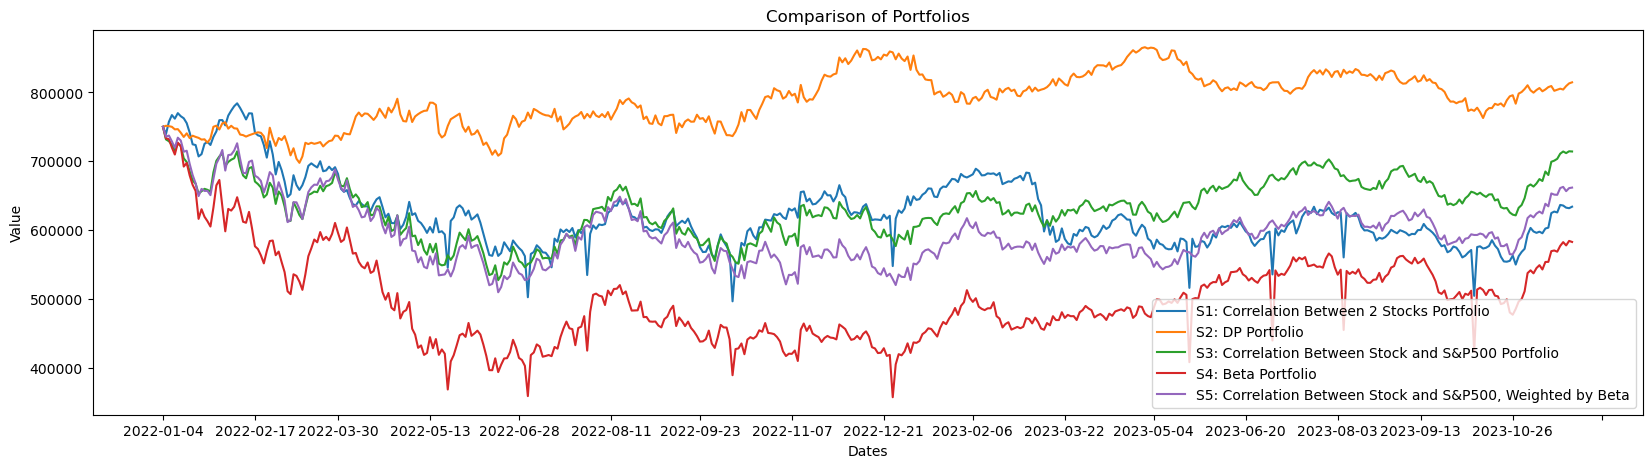

In [58]:
# Graph the test portfolios

plt.figure(figsize = (20, 5))

# Strategy 1
plt.plot(test_portfolio1.index, test_portfolio1['Total Value'], label='S1: Correlation Between 2 Stocks Portfolio')

# Strategy 2
plt.plot(test_portfolio2.index, test_portfolio2['Total Value'], label='S2: DP Portfolio')

# Strategy 3
plt.plot(test_portfolio3.index, test_portfolio3['Total Value'], label='S3: Correlation Between Stock and S&P500 Portfolio')

# Strategy 4
plt.plot(test_portfolio4.index, test_portfolio4['Total Value'], label = 'S4: Beta Portfolio')

# Strategy 5
plt.plot(test_portfolio5.index, test_portfolio5['Total Value'], label = 'S5: Correlation Between Stock and S&P500, Weighted by Beta')

locator = mdate.MonthLocator()
plt.gca().xaxis.set_major_locator(locator)

plt.title('Comparison of Portfolios')
plt.xlabel('Dates')
plt.ylabel('Value')

plt.legend()
plt.show()

In [59]:
# Calculate the standard deviation of each portfolio's percent returns

test_portfolios = [test_portfolio1, test_portfolio2, test_portfolio3, test_portfolio4, test_portfolio5]

# Consumes a test portfolio
# Returns the standard deviations of the percent returns of the total values of investment over time
def get_test_percent_returns(test_portfolio):

    # Create a dataframe with the portfolio's total value
    pct_returns = pd.DataFrame()

    pct_returns['Value'] = portfolio['Total Value']

    # Add a column for percent returns of the total value
    pct_returns['% Returns'] = portfolio['Total Value'].pct_change()

    pct_returns.drop(index = pct_returns.index[0], inplace = True)

    # Calculate standard deviation of percent returns
    std_dev_of_returns = pct_returns['% Returns'].std()

    return std_dev_of_returns

pNum = 0

for portfolio in test_portfolios:
    pNum += 1
    print(f'Test Portfolio {pNum} Standard Deviation of % Returns: {(get_test_percent_returns(portfolio))}')

Test Portfolio 1 Standard Deviation of % Returns: 0.027604820904210594
Test Portfolio 2 Standard Deviation of % Returns: 0.010266158336988847
Test Portfolio 3 Standard Deviation of % Returns: 0.016593745334018337
Test Portfolio 4 Standard Deviation of % Returns: 0.0386256065668285
Test Portfolio 5 Standard Deviation of % Returns: 0.018580734271363687


## Final Strategy: Strategy 4: Beta

It is clearly evident from the graph that Strategy 4 had the highest volatility, dropping in value the most overall from the initial investment and displaying several abrupt dips, despite trending in the same direction as the other stocks. This drop in value can be quantified using the absolute value of standard deviation(can also use variance) with a higher standard deviation indicating greater volatility and hence risk. Strategy 4 also resulted in the highest standard deviation of 0.0386, further cementing it as the "riskiest" strategy of the five tested.

## Final Portfolio Creation

In [62]:
# Our final portfolio, using strategy 4
# Need to regenerate with "2023-11-25"
Portfolio_Final = generate_portfolio(s4_tickers, investment, end_date)

# Verifying the total and sum of weights
final_portfolio_total = round(Portfolio_Final.Value.sum() + (flat_fee * num_stocks))
final_portfolio_weights = Portfolio_Final.Weight.sum()

print(f'The total value of the portfolio is ${final_portfolio_total}')
print(f'The sum of the weights is: {final_portfolio_weights}')

The total value of the portfolio is $750000
The sum of the weights is: 1.0


In [63]:
Portfolio_Final

,Ticker,Price,Currency,Shares,Value,Weight
1,SHOP.TO,96.260002,CAD,1947.720973,187487.625,0.25
2,AMZN,200.960444,USD,932.957858,187487.625,0.25
3,PYPL,76.363320,USD,1473.123157,112492.575,0.15
4,QCOM,174.953630,USD,214.328362,37497.525,0.05
5,BLK,999.871947,USD,37.502327,37497.525,0.05
6,AAPL,260.163924,USD,144.130379,37497.525,0.05
7,ACN,457.467805,USD,81.967571,37497.525,0.05
8,BA,301.290009,USD,124.456583,37497.525,0.05
9,AXP,225.173194,USD,166.527482,37497.525,0.05
10,TXN,210.341506,USD,178.269737,37497.525,0.05


In [64]:
# Create the "Stock_Final" dataframe
Stocks_Final = pd.DataFrame()
Stocks_Final['Ticker'] = Portfolio_Final['Ticker']
Stocks_Final['Shares'] = Portfolio_Final['Shares']
Stocks_Final

,Ticker,Shares
1,SHOP.TO,1947.720973
2,AMZN,932.957858
3,PYPL,1473.123157
4,QCOM,214.328362
5,BLK,37.502327
6,AAPL,144.130379
7,ACN,81.967571
8,BA,124.456583
9,AXP,166.527482
10,TXN,178.269737


In [65]:
# Output the final stocks and the number of shares to a CSV
Stocks_Final.to_csv("Stocks_Group_7.csv")

## Contribution Declaration

The following team members made a meaningful contribution to this assignment:

Ashton

Bodhana

Johnson